In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
root = 'stock_price'
company = 'FB'
companydf = pd.read_csv(os.path.join(root, company + '.csv'))

companydf['date'] = pd.to_datetime(companydf['date'])
companydf =  companydf[(companydf['date'] >= pd.Timestamp(2016, 1, 1)) & (companydf['date'] <= pd.Timestamp(2018, 12, 31))]
companydf = companydf.reset_index(drop=True)
companydf['time_delta'] = (companydf['date'] - pd.Timestamp(2016, 1, 1)).map(lambda x: x.days)
companydf['diff'] = companydf['5. adjusted close'].diff()
companydf['diff'] = companydf['diff'].fillna(0.0)
assert not companydf.isnull().values.any()
companydf

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,time_delta,diff
0,2016-01-04,101.95,102.2400,99.7500,102.22,102.22,37912403.0,0.0,1.0,3,0.00
1,2016-01-05,102.89,103.7099,101.6650,102.73,102.73,23258238.0,0.0,1.0,4,0.51
2,2016-01-06,101.13,103.7700,100.9000,102.97,102.97,25096183.0,0.0,1.0,5,0.24
3,2016-01-07,100.50,101.4300,97.3000,97.92,97.92,45172906.0,0.0,1.0,6,-5.05
4,2016-01-08,99.88,100.5000,97.0311,97.33,97.33,35402298.0,0.0,1.0,7,-0.59
5,2016-01-11,97.91,98.6000,95.3900,97.51,97.51,29932385.0,0.0,1.0,10,0.18
6,2016-01-12,99.00,99.9600,97.5500,99.37,99.37,28395390.0,0.0,1.0,11,1.86
7,2016-01-13,100.58,100.5800,95.2100,95.44,95.44,33410553.0,0.0,1.0,12,-3.93
8,2016-01-14,95.85,98.8700,92.4500,98.37,98.37,48658623.0,0.0,1.0,13,2.93
9,2016-01-15,93.98,96.3800,93.5400,94.97,94.97,46132781.0,0.0,1.0,14,-3.40


Text(0.5, 1.0, 'FB')

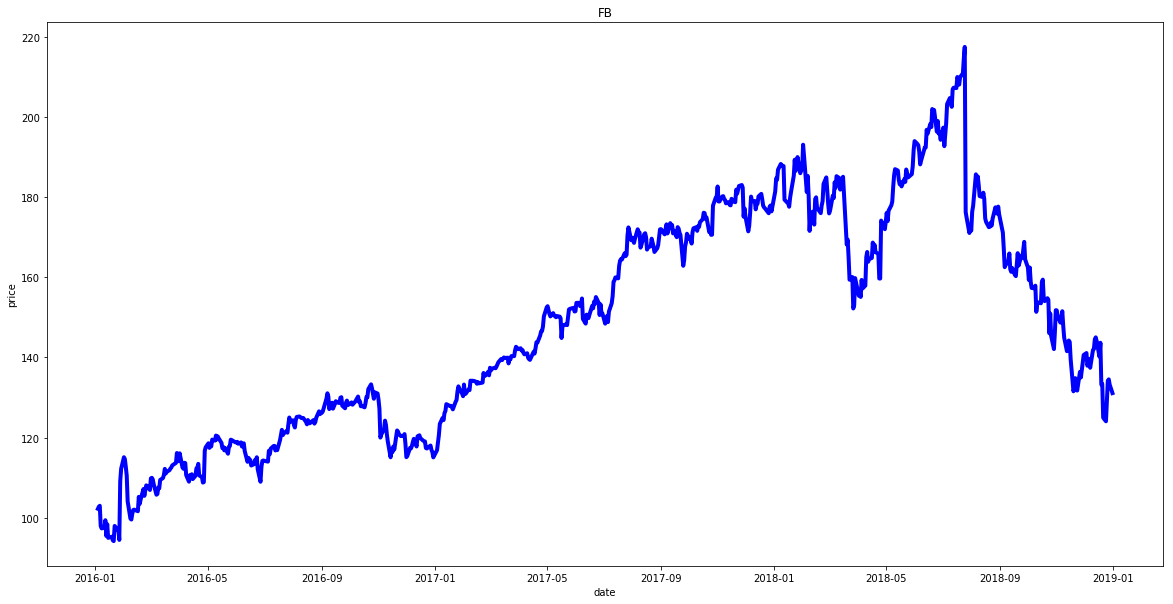

In [3]:
plt.figure(figsize=(20,10))
plt.plot(companydf['date'], companydf['5. adjusted close'], color='blue', linewidth=4)
plt.xlabel('date')
plt.ylabel('price')
plt.title(company)

In [4]:
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

dataset = companydf.drop(['4. close', '7. dividend amount','8. split coefficient'], axis=1)
dataset['target'] = dataset['5. adjusted close'].shift(-1)
dataset = dataset.iloc[:-1]

train_data = dataset[(dataset['date'] >= pd.Timestamp(2016, 1, 1)) & (dataset['date'] <= pd.Timestamp(2017, 12, 31))]
test_data = dataset[(dataset['date'] >= pd.Timestamp(2018, 1, 1)) & (dataset['date'] <= pd.Timestamp(2018, 12, 31))]

train_X = train_data.drop(['date', 'target'], axis=1).values
train_Y = train_data[['target']].copy().values

test_X = test_data.drop(['date', 'target'], axis=1).values
test_Y = test_data[['target']].copy().values

poly = sklearn.preprocessing.PolynomialFeatures(1)
train_X_t = poly.fit_transform(train_X)
test_X_t = poly.fit_transform(test_X)

linear_mod = linear_model.LinearRegression() # defining the linear regression model
linear_mod.fit(train_X_t, train_Y) # fitting the data points in the model

predict_train = linear_mod.predict(train_X_t)
predict_test = linear_mod.predict(test_X_t)

rmse = np.sqrt(mean_squared_error(test_Y,predict_test))
r2 = r2_score(test_Y,predict_test)

rmse:  4.573174229327635
r2:  0.9475452556694545


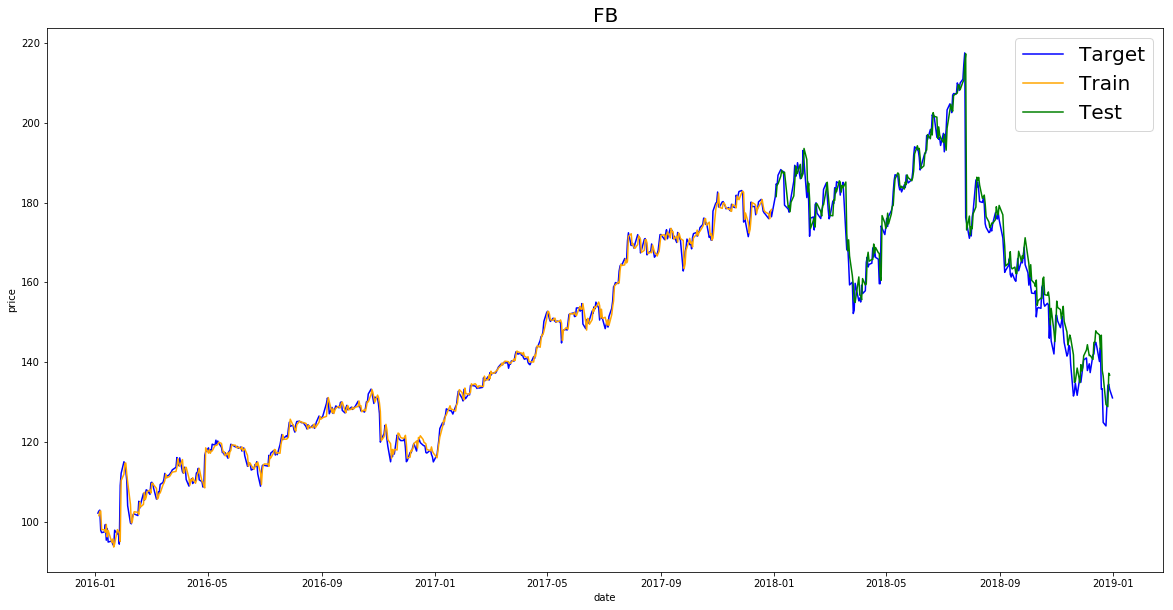

In [5]:
from pandas.tseries.offsets import DateOffset
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

ax.plot(companydf['date'], companydf['5. adjusted close'], color='blue', linewidth=1.5, alpha=1, label='Target')
ax.plot(train_data['date'].iloc[1:], predict_train[:-1], color='orange', linewidth=1.5, alpha=1, label='Train')
ax.plot(test_data['date'].iloc[1:], predict_test[:-1], color='green', linewidth=1.5, alpha=1, label='Test')

plt.xlabel('date')
plt.ylabel('price')
plt.title(company, fontsize=20)
ax.legend(prop={'size': 20})

print('rmse: ', rmse)
print('r2: ', r2)

In [6]:
dataset['label'] = dataset['diff'].map(lambda x : 1 if x >0 else 0)
dataset

,date,1. open,2. high,3. low,5. adjusted close,6. volume,time_delta,diff,target,label
0,2016-01-04,101.95,102.2400,99.7500,102.22,37912403.0,3,0.00,102.73,0
1,2016-01-05,102.89,103.7099,101.6650,102.73,23258238.0,4,0.51,102.97,1
2,2016-01-06,101.13,103.7700,100.9000,102.97,25096183.0,5,0.24,97.92,1
3,2016-01-07,100.50,101.4300,97.3000,97.92,45172906.0,6,-5.05,97.33,0
4,2016-01-08,99.88,100.5000,97.0311,97.33,35402298.0,7,-0.59,97.51,0
5,2016-01-11,97.91,98.6000,95.3900,97.51,29932385.0,10,0.18,99.37,1
6,2016-01-12,99.00,99.9600,97.5500,99.37,28395390.0,11,1.86,95.44,1
7,2016-01-13,100.58,100.5800,95.2100,95.44,33410553.0,12,-3.93,98.37,0
8,2016-01-14,95.85,98.8700,92.4500,98.37,48658623.0,13,2.93,94.97,1
9,2016-01-15,93.98,96.3800,93.5400,94.97,46132781.0,14,-3.40,95.26,0


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

train_data = dataset[(dataset['date'] >= pd.Timestamp(2016, 1, 1)) & (dataset['date'] <= pd.Timestamp(2017, 12, 31))]
test_data = dataset[(dataset['date'] >= pd.Timestamp(2018, 1, 1)) & (dataset['date'] <= pd.Timestamp(2018, 12, 31))]

train_X = train_data.drop(['date','label','target'], axis=1) #.values
train_Y = train_data[['label']].copy().values.reshape(-1,)

test_X = test_data.drop(['date','label','target'], axis=1) #.values
test_Y = test_data[['label']].copy().values.reshape(-1,)

linear_mod = LogisticRegressionCV(solver='lbfgs', cv = 10) # defining the linear regression model
linear_mod.fit(train_X, train_Y) # fitting the data points in the model

predict_train = linear_mod.predict(train_X)
predict_test = linear_mod.predict(test_X)

acc = linear_mod.score(test_X, test_Y)
# rmse = np.sqrt(mean_squared_error(test_Y,predict_test))
# r2 = r2_score(test_Y,predict_test)
acc

0.508